In [1]:
import numpy as np
import pickle
pa_ls = pickle.load(open('C:\\Data\\Str-tmp\\nano-tracer\\dna4\\data\\composed_traj\\3arms-jun_10\\30C-0.1M-GPU\\3arms@(30C,0.1M)-jun_10.patp','rb')) # 4arms\\20C-0.5M-GPU\\4arms@(20C,0.5M) # 4arms-jun_10\\30C-0.1M-GPU\\4arms@(30C,0.1M)-jun_10
k2_ls = pickle.load(open('C:\\Data\\Str-tmp\\nano-tracer\\dna4\\data\\composed_traj\\3arms-jun_10\\30C-0.1M-GPU\\3arms@(30C,0.1M)-jun_10.k2tp','rb'))
stack_dict,non_stack_dict = pickle.load(open('C:\\Data\\Str-tmp\\nano-tracer\\dna4\\results\\3arms-jun_10\\pa\\pa_vtime-3arms@(30C,0.1M)-jun_10.stack','rb'))

In [14]:
from plot_tasks.ns_plots.ns_k2_plot import data_process_func as process_k2
from plot_tasks.ns_plots.ns_pa_plot import data_process_func as process_pa
pa_dict = process_pa(pa_ls, None, True)
k2_dict = process_k2(k2_ls, None, True)


Total time steps dropped: 0


**Principal moments (Lambdas)**
Scatter, Heatmap, Contour, Gaussian-KDE Contour (Ongoing)

In [15]:
lbd_axs_ls = k2_dict['axes']
lbd1_ls = []
l2_ls = []
l3_ls = []
for conf_lbd in lbd_axs_ls:
    (lbd1,axs1),(lbd2,axs2),(lbd3,axs3) = conf_lbd
    lbd1_ls.append(lbd1)
    l2_ls.append(lbd2/lbd1)
    l3_ls.append(lbd3/lbd1)
l2_arr = np.array(l2_ls)
l3_arr = np.array(l3_ls)


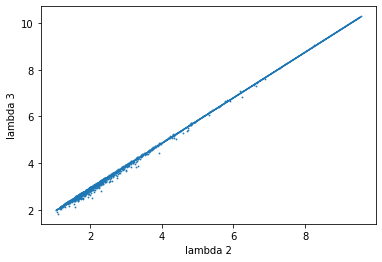

Slope = 0.976 ± 0.002 ; Intersect = 0.939 ± 0.006


In [23]:
import matplotlib.pyplot as plt
import scipy.stats as stat
ret_linreg = stat.linregress(l2_arr,l3_arr)
a = ret_linreg.slope
a_err = ret_linreg.stderr
b = ret_linreg.intercept
b_err = ret_linreg.intercept_stderr
plt.plot(l2_arr,a*l2_arr+b)
plt.scatter(l2_arr,l3_arr,s=0.6)
plt.xlabel('lambda 2')
plt.ylabel('lambda 3')
plt.show()
print(f'Slope = {a:.3f} ± {a_err:.3f} ; Intersect = {b:.3f} ± {b_err:.3f}')

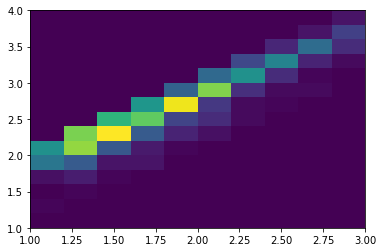

In [5]:
import matplotlib.pyplot as plt
plt.hist2d(l2_arr,l3_arr,bins=(30,30),range=np.array([[1,7],[1,7]]))
H, x_edges, y_edges = np.histogram2d(l2_arr,l3_arr,bins=(30,30),range=np.array([[1,7],[1,7]]))
plt.xlim((1,3))
plt.ylim((1,4))
plt.show()

In [6]:
x_edges[0:5]
H[0:10,0:10]

array([[ 0.,  1.,  0.,  3., 29., 37.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 21., 62., 59.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  4., 20., 74., 48.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  4.,  5., 21., 56., 39.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  7., 15., 72., 23.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  3.,  9., 12., 60.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

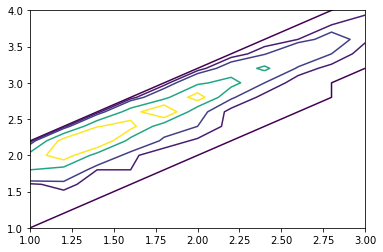

In [41]:
plt.contour(x_edges[:-1],y_edges[:-1],np.transpose(H),levels=[0,4,9,29,49])
plt.xlim((1,3))
plt.ylim((1,4))
plt.show()

In [29]:
def get_rot_from_principal_axes(p_ax0,p_ax1,p_ax2):
    x = p_ax2
    y = p_ax1
    z = p_ax0
    x_unit = x/np.linalg.norm(x)
    y_unit = y/np.linalg.norm(y)
    z_unit = z/np.linalg.norm(z)
    rot_mat = np.vstack((x_unit,y_unit,z_unit)).T
    rot_mat = np.linalg.inv(rot_mat)
    return rot_mat

cnt = 0
t_ls = k2_dict['t']
for l2, l3 in zip(l2_ls, l3_ls):
    if l3 > 2.85 and l3 < 2.9 and l2 < 1.95 and l2 > 1.9:
        idx = l2_ls.index(l2)
        t = t_ls[idx]
        arm0_pos, arm1_pos = pa_dict[(0,1)][t][1]
        _, arm2_pos = pa_dict[(1,2)][t][1]
        p_ax0_pos = lbd_axs_ls[idx][0][1]
        p_ax1_pos = lbd_axs_ls[idx][1][1]
        p_ax2_pos = lbd_axs_ls[idx][2][1]
        print(f'Ex. Index: {idx} , at time_step: {t}, l2_r = {l2:.3f} , l3_r = {l3:.3f}')
        print(f'Arm0_Pos: {arm0_pos} ; Arm1_Pos: {arm1_pos} ; Arm2_Pos: {arm2_pos}') 
        print(f'P_AX0_pos: {p_ax0_pos} ; P_AX1_pos: {p_ax1_pos} ; P_AX2_pos: {p_ax2_pos}')
        rot_mat = get_rot_from_principal_axes(p_ax0_pos,p_ax1_pos,p_ax2_pos)
        arm0_pos = np.matmul(rot_mat,arm0_pos)
        arm1_pos = np.matmul(rot_mat,arm1_pos)
        arm2_pos = np.matmul(rot_mat,arm2_pos)
        print(f'Rotated. Arm0_Pos: {arm0_pos} ; Arm1_Pos: {arm1_pos} ; Arm2_Pos: {arm2_pos}') 
        print(f'CHK: {np.matmul(rot_mat,p_ax0_pos)}')
        cnt += 1
        if cnt == 2:
            break

Ex. Index: 39 , at time_step: 54000000, l2_r = 1.943 , l3_r = 2.869
Arm0_Pos: [ 5.2209301   5.00552392 -2.07178783] ; Arm1_Pos: [-2.7654357  -5.43155116  4.59122944] ; Arm2_Pos: [-0.63303471 -5.29699084 -5.23101664]
P_AX0_pos: [-0.51018666 -0.81449179  0.27624753] ; P_AX1_pos: [0.20753571 0.19511668 0.95857103] ; P_AX2_pos: [ 0.83464873 -0.54638138 -0.0694902 ]
Rotated. Arm0_Pos: [ 1.76668659  0.07423484 -7.31293329] ; Arm1_Pos: [0.34048554 2.76730663 7.10315803] ; Arm2_Pos: [ 2.72931993 -6.17920956  3.19226596]
CHK: [7.28583860e-17 5.55111512e-17 1.00000000e+00]
Ex. Index: 52 , at time_step: 55300000, l2_r = 1.942 , l3_r = 2.879
Arm0_Pos: [-1.80936146 -4.17787469  5.55161953] ; Arm1_Pos: [ 2.12465477  6.7420783  -2.65762186] ; Arm2_Pos: [-3.28139973 -5.39859307 -4.0064311 ]
P_AX0_pos: [0.48444857 0.86837719 0.10597467] ; P_AX1_pos: [ 0.20039886 -0.22807518  0.95279694] ; P_AX2_pos: [-0.85155733  0.44034391  0.28451249]
Rotated. Arm0_Pos: [ 1.28057842  5.87984164 -3.91618264] ; Arm1_Po

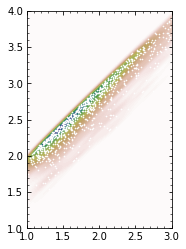

In [42]:
xmin = 1
xmax = 10
ymin = 1
ymax = 10
X, Y = np.mgrid[xmin:xmax:1000j, ymin:ymax:1000j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([l2_arr, l3_arr])
kernel = stat.gaussian_kde(values,bw_method=0.2)
Z = np.reshape(kernel(positions).T, X.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.scatter(l2_arr, l3_arr, s=0.4,c='#FFFFFF')
ax.set_xlim([1, 3])
ax.set_ylim([1, 4])
ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in')
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in',which='minor')
plt.savefig('tmp.png',dpi=400)
plt.show()

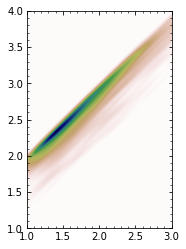

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
# ax.scatter(l2_arr, l3_arr, s=0.4,c='#FFFFFF')
ax.set_xlim([1, 3])
ax.set_ylim([1, 4])
ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in')
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in',which='minor')
plt.savefig('tmp.jpg',dpi=400)
plt.show()

**Patch Angles**
3D Scatter Plot

In [5]:
# pooling is wrong
ns_struc_4arm = {'linked_PA': [(0,1),(0,3),(1,2),(2,3)], 'unlinked_PA': [(0,2),(1,3)], 'pairing_linked':[((0,1),(2,3)),((0,3),(1,2))], 'pairing_unlinked':[((0,2),(1,3))]}
# S: linked, stacking
S_PA_arr = np.array([])
for idx_tp in ns_struc_4arm['linked_PA']: # pool
    S_PA_arr = np.hstack((S_PA_arr,np.array(stack_dict[idx_tp]['raw'])*np.array(stack_dict[idx_tp]['bool']))) 
# N: linked, not stacking
N_PA_arr = np.array([])
for idx_tp in ns_struc_4arm['linked_PA']: # pool
    N_PA_arr = np.hstack((N_PA_arr,np.array(non_stack_dict[idx_tp]['raw'])*np.array(non_stack_dict[idx_tp]['bool']))) 
# U: unlinked
U_PA_arr = np.array([])
for idx_tp in ns_struc_4arm['unlinked_PA']:
    U_PA_arr = np.hstack((U_PA_arr,np.array(stack_dict[idx_tp]['raw'])))

In [2]:
ns_struc_4arm = {'linked_PA': [(0,1),(0,3),(1,2),(2,3)], 'unlinked_PA': [(0,2),(1,3)], 'pairing_linked':[((0,1),(2,3)),((0,3),(1,2))], 'pairing_unlinked':[((0,2),(1,3))]}
is_stack_01 = stack_dict[(0,1)]['bool']
is_stack_12 = stack_dict[(1,2)]['bool']
is_stack_23 = stack_dict[(2,3)]['bool']
is_stack_03 = stack_dict[(0,3)]['bool']
t_ls = stack_dict[(0,1)]['t']
plot_S_ls = []
plot_N_ls = []
plot_U_ls = []
# plot a point, if 2 stacking happening
for t, is_S_01, is_S_12, is_S_23, is_S_03 in zip(t_ls,is_stack_01,is_stack_12,is_stack_23,is_stack_03):
    if is_S_01 and is_S_23:
        idx = t_ls.index(t)
        plot_S_ls.append(stack_dict[(0,1)]['raw'][idx])
        plot_S_ls.append(stack_dict[(2,3)]['raw'][idx])
        plot_N_ls.append(stack_dict[(0,3)]['raw'][idx])
        plot_N_ls.append(stack_dict[(1,2)]['raw'][idx])
        plot_U_ls.append(stack_dict[(0,2)]['raw'][idx])
        plot_U_ls.append(stack_dict[(1,3)]['raw'][idx])
    elif is_S_03 and is_S_12:
        idx = t_ls.index(t)
        plot_S_ls.append(stack_dict[(0,3)]['raw'][idx])
        plot_S_ls.append(stack_dict[(1,2)]['raw'][idx])
        plot_N_ls.append(stack_dict[(0,1)]['raw'][idx])
        plot_N_ls.append(stack_dict[(2,3)]['raw'][idx])
        plot_U_ls.append(stack_dict[(0,2)]['raw'][idx])
        plot_U_ls.append(stack_dict[(1,3)]['raw'][idx])

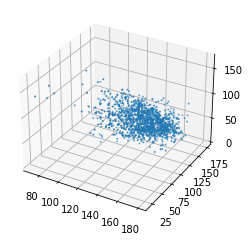

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.auto_scale_xyz([0, 180], [0, 180], [0, 180])
ax.scatter(plot_S_ls,plot_N_ls,plot_U_ls,s=1)
plt.show()

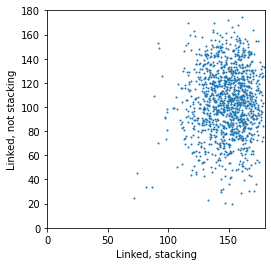

In [4]:
lim=(0,180)
plt.scatter(plot_S_ls,plot_N_ls,s=1)
plt.xlabel('Linked, stacking')
plt.ylabel('Linked, not stacking')
plt.xlim(lim)
plt.ylim(lim)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

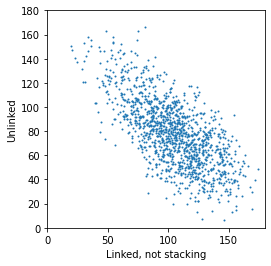

In [6]:
plt.scatter(plot_N_ls,plot_U_ls,s=1)
plt.xlabel('Linked, not stacking')
plt.ylabel('Unlinked')
plt.xlim(lim)
plt.ylim(lim)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

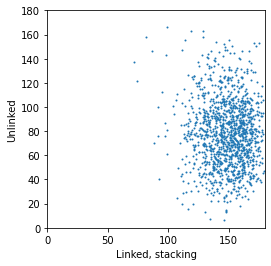

In [7]:
plt.scatter(plot_S_ls,plot_U_ls,s=1)
plt.xlabel('Linked, stacking')
plt.ylabel('Unlinked')
plt.xlim(lim)
plt.ylim(lim)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

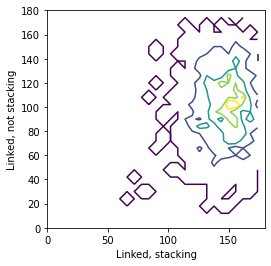

In [24]:
# plt.hist2d(plot_S_ls,plot_N_ls,bins=(90,90),range=np.array([[0,180],[0,180]]))
H, x_edges, y_edges = np.histogram2d(plot_S_ls,plot_N_ls,bins=(30,30),range=np.array([[0,180],[0,180]]))
plt.contour(x_edges[:-1],y_edges[:-1],np.transpose(H),[0,4,9,14,17])
plt.xlabel('Linked, stacking')
plt.ylabel('Linked, not stacking')
plt.xlim(lim)
plt.ylim(lim)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

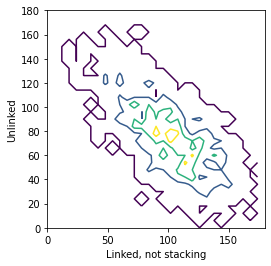

In [26]:
plt.xlabel('Linked, not stacking')
plt.ylabel('Unlinked')
H, x_edges, y_edges = np.histogram2d(plot_N_ls,plot_U_ls,bins=(30,30),range=np.array([[0,180],[0,180]]))
plt.contour(x_edges[:-1],y_edges[:-1],np.transpose(H),[0,4,9,14])
plt.xlim(lim)
plt.ylim(lim)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

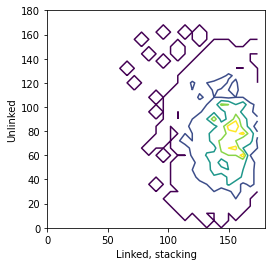

In [23]:
plt.xlabel('Linked, stacking')
plt.ylabel('Unlinked')
H, x_edges, y_edges = np.histogram2d(plot_S_ls,plot_U_ls,bins=(30,30),range=np.array([[0,180],[0,180]]))
plt.contour(x_edges[:-1],y_edges[:-1],np.transpose(H),[0,4,9,14,17])
plt.xlim(lim)
plt.ylim(lim)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()